### 3.6 Lab: Linear Regression

This notebook contains the lab at the end of [Chapter 3 - Linear Regression](http://nbviewer.jupyter.org/github/Ditdili/An_Intro_To_Statistical_Learning/blob/master/notebooks/Chapter-3-Linear_Regression.ipynb) of ISL.

* [3.6.2 - Simple Linear Regression](#sim_lin_reg)
* [3.6.3 - Multiple Linear Regression](#mult_lin_reg)
* [3.6.4 - Interaction Terms](#int_terms)
* [3.6.5 - Non-linear Transformations of the Predictors](#non_lin)
* [3.6.6 - Qualitative Predictors](#qual_pred)
* [3.6.7 - Writing Functions](#wri_fun)


__Standard imports:__

In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns; sns.set_style('whitegrid')

<a id='sim_lin_reg'></a>

#### 3.6.2 - Simple Linear Regression

The R's __MASS__ library doesn't exist in Python. We can use the data set from __scikit-learn__, or, as in the case below, load the data set from csv file.

In [2]:
# Loading the data set
data_boston = pd.read_csv('Data/Boston.csv')
data_boston.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


<br><br>
The __Boston__ data set contains median house value (__medv__) for 506 neighborhoods of Boston. In this lab we will be predicting __medv__ using 13 predictors.

In [3]:
# Checking the info of the data set
data_boston.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
crim       506 non-null float64
zn         506 non-null float64
indus      506 non-null float64
chas       506 non-null int64
nox        506 non-null float64
rm         506 non-null float64
age        506 non-null float64
dis        506 non-null float64
rad        506 non-null int64
tax        506 non-null int64
ptratio    506 non-null float64
black      506 non-null float64
lstat      506 non-null float64
medv       506 non-null float64
dtypes: float64(11), int64(3)
memory usage: 55.4 KB


Attribute Information (in order) taken from the internet:
- CRIM     per capita crime rate by town
- ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
- INDUS    proportion of non-retail business acres per town
- CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
- NOX      nitric oxides concentration (parts per 10 million)
- RM       average number of rooms per dwelling
- AGE      proportion of owner-occupied units built prior to 1940
- DIS      weighted distances to five Boston employment centres
- RAD      index of accessibility to radial highways
- TAX      full-value property-tax rate per 10000 dollars
- PTRATIO  pupil-teacher ratio by town
- B        where Bk is the proportion of blacks by town (1000(Bk - 0.63)^2))
- LSTAT    % lower status of the population
- MEDV     Median value of owner-occupied homes in $1000's

We are using statsmodels (to have similar i/o as in R) to fit a simple linear regression model, with the response __medv__ and the predictor __lstat__

In [4]:
# Importing the needed module
import statsmodels.formula.api as smf

# Linear model and printing the summary table
lm = smf.ols('medv ~ lstat', data=data_boston).fit()
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                   medv   R-squared:                       0.544
Model:                            OLS   Adj. R-squared:                  0.543
Method:                 Least Squares   F-statistic:                     601.6
Date:                Tue, 05 Dec 2017   Prob (F-statistic):           5.08e-88
Time:                        11:19:24   Log-Likelihood:                -1641.5
No. Observations:                 506   AIC:                             3287.
Df Residuals:                     504   BIC:                             3295.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     34.5538      0.563     61.415      0.0

<br><br>
R has the __names()__ function to display the available information stored in __lm.fit__. We can substitute it wit __dir(lm)__ in Python.

In [5]:
np.array(dir(lm))

array(['HC0_se', 'HC1_se', 'HC2_se', 'HC3_se', '_HCCM', '__class__',
       '__delattr__', '__dict__', '__dir__', '__doc__', '__eq__',
       '__format__', '__ge__', '__getattribute__', '__gt__', '__hash__',
       '__init__', '__init_subclass__', '__le__', '__lt__', '__module__',
       '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__',
       '__setattr__', '__sizeof__', '__str__', '__subclasshook__',
       '__weakref__', '_cache', '_data_attr', '_get_robustcov_results',
       '_is_nested', '_wexog_singular_values', 'aic', 'bic', 'bse',
       'centered_tss', 'compare_f_test', 'compare_lm_test',
       'compare_lr_test', 'condition_number', 'conf_int', 'conf_int_el',
       'cov_HC0', 'cov_HC1', 'cov_HC2', 'cov_HC3', 'cov_kwds',
       'cov_params', 'cov_type', 'df_model', 'df_resid', 'diagn',
       'eigenvals', 'el_test', 'ess', 'f_pvalue', 'f_test', 'fittedvalues',
       'fvalue', 'get_influence', 'get_prediction',
       'get_robustcov_results', 'initialize', 'k_c

In [6]:
# Printing the intercept and coefficient
print(lm.params)

# Printing confidence interval for the coefficient estimates
print('\n',lm.conf_int())

Intercept    34.553841
lstat        -0.950049
dtype: float64

                    0          1
Intercept  33.448457  35.659225
lstat      -1.026148  -0.873951


<br><br>
Calculating __confidence intervals__ and __prediction intervals__:

In [7]:
# Confidence intervals lower and upper - mean_ci_lower, mean_ci_upper
# Prediction intervals lower and upper - obs_ci_lower, obs_ci_upper
predictions = lm.get_prediction(pd.DataFrame({'lstat': [5, 10, 15]}))
predictions.summary_frame(0.05)

,mean,mean_se,mean_ci_lower,mean_ci_upper,obs_ci_lower,obs_ci_upper
0,29.803594,0.405247,29.007412,30.599776,17.565675,42.041513
1,25.053347,0.294814,24.474132,25.632563,12.827626,37.279068
2,20.303101,0.290893,19.731588,20.874613,8.077742,32.528459


<br><br>
Plotting __medv__ vs. __lstat__ along with the least squares regression line:

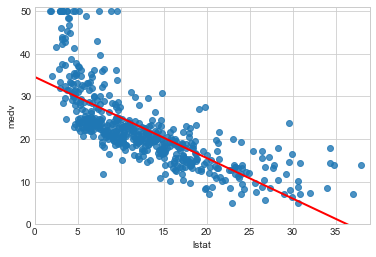

In [8]:
X = data_boston[['lstat']]

x_line = np.arange(int(np.min(X) - 1), int(np.max(X) + 1))
y_line = lm.params[0] + lm.params[1] * x_line

data_boston.plot(x='lstat', y='medv', style='o', alpha=0.8, legend=False)
plt.plot(x_line, y_line, 'r', linewidth=2)

plt.xlim(0, np.max(data_boston['lstat']) + 1)
plt.ylim(0, np.max(data_boston['medv']) + 1)
plt.ylabel('medv');

<br><br>
As I mentioned in the [Chapter 3](http://nbviewer.jupyter.org/github/Ditdili/An_Intro_To_Statistical_Learning/blob/master/notebooks/Chapter-3-Linear_Regression.ipynb), R produces 4 different plots when plot() function is used. We can recreate those plots:

In [9]:
# Residuals vs. Fitted plot
def res_vs_fit(x, y, ax=None):
    if ax is None:
        ax = plt.gca()
    ax = sns.residplot(x, y, lowess=True, scatter_kws={'alpha': 0.8}, 
                       line_kws={'color': 'red', 'lw': 2, 'alpha': 0.8})
    
    ax.set_xlabel('Fitted')
    ax.set_ylabel('Residuals');

# Q-Q Plot    
def qq_plot(x, ax=None):
    if ax is None:
        ax = plt.gca()
    from statsmodels.graphics.gofplots import ProbPlot
    QQ = ProbPlot(x)
    QQ.qqplot(line='45', alpha=0.5, color='#4C72B0', lw=1, ax=ax)
    ax.set_ylabel('Standardized Residuals');
    
# Scale-location Plot
def scale_location(x, y, ax=None):
    if ax is None:
        ax = plt.gca()
        
    ax.scatter(x, y, alpha=0.8)
    ax = sns.regplot(x, y, scatter=False, ci=False, lowess=True,
                line_kws={'color': 'red', 'lw': 2, 'alpha': 0.8})
    
    ax.set_xlabel('Fitted')
    ax.set_ylabel('Sq-rt Standardized Residuals');
    
# Residual vs. Leverage Plot
def leverage_vs_res_std(x, y, ax=None):
    if ax is None:
        ax = plt.gca()
    
    ax.scatter(x, y, alpha=0.8, label=None)
    ax = sns.regplot(x, y, scatter=False, ci=False, lowess=True,
                     line_kws={'color': 'red', 'lw': 2, 'alpha': 0.8})

    ax.set_xlim(np.min(x), np.max(x))
    ax.set_ylim(np.min(y), np.max(y))
    ax.set_xlabel('Leverage')
    ax.set_ylabel('Standardized Residuals')

    # shenanigans for cook's distance contours
    def graph(formula, x_range, label=None):
        x = x_range
        y = formula(x)
        ax.plot(x, y, label=label, lw=1, ls='--', color='red')

    p = len(lm.params) # number of model parameters

    graph(lambda t: np.sqrt((0.5 * p * (1 - t)) / t), 
          np.linspace(0.001, 0.200, 50), 
          'Cook\'s distance') # 0.5 line

    graph(lambda t: np.sqrt((1 * p * (1 - t)) / t), 
          np.linspace(0.001, 0.200, 50)) # 1 line

    ax.legend(loc='upper right');

<br><br>
__Plotting__ the defined functions:

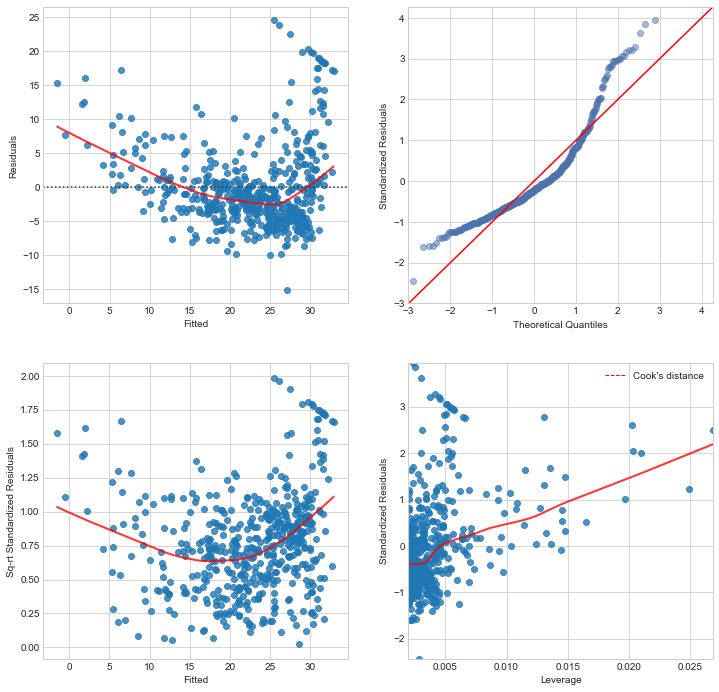

In [10]:
# Defining the variables:
fitted = lm.fittedvalues
residuals = lm.resid

# Standardization of the data
residuals_norm = lm.get_influence().resid_studentized_internal

# or it can be done by using the below code
# mu = np.mean(residuals, axis=0)
# sigma = np.std(residuals, axis=0)
# residuals_norm = (residuals - mu) / sigma

# Square root of absolute values of standardized residuals
residuals_abs_sqrt = np.sqrt(np.abs(residuals_norm))

# Leverage
lm_leverage = lm.get_influence().hat_matrix_diag

fig = plt.figure(figsize=(12, 12))

res_vs_fit(fitted, residuals, fig.add_subplot(2, 2, 1))
qq_plot(residuals_norm, fig.add_subplot(2, 2, 2))
scale_location(fitted, residuals_abs_sqrt, fig.add_subplot(2, 2, 3))
leverage_vs_res_std(lm_leverage, residuals_norm, fig.add_subplot(2, 2, 4))

<a id='mult_lin_reg'></a>

#### 3.6.3 - Multiple Linear Regression

In [11]:
lm = smf.ols('medv ~ lstat + age', data = data_boston).fit()
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                   medv   R-squared:                       0.551
Model:                            OLS   Adj. R-squared:                  0.549
Method:                 Least Squares   F-statistic:                     309.0
Date:                Tue, 05 Dec 2017   Prob (F-statistic):           2.98e-88
Time:                        11:19:26   Log-Likelihood:                -1637.5
No. Observations:                 506   AIC:                             3281.
Df Residuals:                     503   BIC:                             3294.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     33.2228      0.731     45.458      0.0

<br><br>
In order to be able to plot all columns for multiple linear regression we need to create a list of columns.

In [12]:
columns = "+".join(data_boston.columns.difference(["medv"]))
equation = "medv ~" + columns

lm = smf.ols(equation, data = data_boston).fit()
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                   medv   R-squared:                       0.741
Model:                            OLS   Adj. R-squared:                  0.734
Method:                 Least Squares   F-statistic:                     108.1
Date:                Tue, 05 Dec 2017   Prob (F-statistic):          6.72e-135
Time:                        11:19:26   Log-Likelihood:                -1498.8
No. Observations:                 506   AIC:                             3026.
Df Residuals:                     492   BIC:                             3085.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     36.4595      5.103      7.144      0.0

<br><br>
Statsmodels summary output doens't have VIF calculation like in R. We need to separate the data by the equation created earlier, and then apply __variance_inflation_factor__ function.

In [13]:
from patsy import dmatrices
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Break into left and right hand side; y and X
y, X = dmatrices(equation, data=data_boston, return_type="dataframe")

vif = {}
# For each Xi, calculate VIF
for i in range(X.shape[1]):
    vif[X.columns[i]] = variance_inflation_factor(X.values, i)
    
vif

{'Intercept': 585.26523794231207,
 'age': 3.1008255128153372,
 'black': 1.3485210764063751,
 'chas': 1.0739953275537886,
 'crim': 1.7921915474332406,
 'dis': 3.9559449063727263,
 'indus': 3.9915964183460315,
 'lstat': 2.9414910780919366,
 'nox': 4.3937198475774926,
 'ptratio': 1.7990840492488978,
 'rad': 7.4844963352744722,
 'rm': 1.9337444357832569,
 'tax': 9.0085539475970702,
 'zn': 2.2987581787494418}

<br><br>
In case we need to exclude one of the predictors (in this case __age__) we can change the equation as it is shown below:

In [14]:
equation = "medv ~" + columns +"- age"

lm = smf.ols(equation, data = data_boston).fit()
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                   medv   R-squared:                       0.741
Model:                            OLS   Adj. R-squared:                  0.734
Method:                 Least Squares   F-statistic:                     117.3
Date:                Tue, 05 Dec 2017   Prob (F-statistic):          6.08e-136
Time:                        11:19:26   Log-Likelihood:                -1498.8
No. Observations:                 506   AIC:                             3024.
Df Residuals:                     493   BIC:                             3079.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     36.4369      5.080      7.172      0.0

<a id='int_terms'></a>

#### 3.6.4 - Interaction Terms

In [15]:
lm = smf.ols('medv ~ lstat * age', data = data_boston).fit()
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                   medv   R-squared:                       0.556
Model:                            OLS   Adj. R-squared:                  0.553
Method:                 Least Squares   F-statistic:                     209.3
Date:                Tue, 05 Dec 2017   Prob (F-statistic):           4.86e-88
Time:                        11:19:26   Log-Likelihood:                -1635.0
No. Observations:                 506   AIC:                             3278.
Df Residuals:                     502   BIC:                             3295.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     36.0885      1.470     24.553      0.0

<a id='non_lin'></a>

#### 3.6.5 - Non-linear Transformations of the Predictors

Non-linear transformations of the predictors can be done in __statsmodels__ using the function I(X^2) for a goven predicto X.

In [16]:
lm2 = smf.ols('medv ~ lstat + I(lstat ** 2)', data = data_boston).fit()
print(lm2.summary())

                            OLS Regression Results                            
Dep. Variable:                   medv   R-squared:                       0.641
Model:                            OLS   Adj. R-squared:                  0.639
Method:                 Least Squares   F-statistic:                     448.5
Date:                Tue, 05 Dec 2017   Prob (F-statistic):          1.56e-112
Time:                        11:19:26   Log-Likelihood:                -1581.3
No. Observations:                 506   AIC:                             3169.
Df Residuals:                     503   BIC:                             3181.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept        42.8620      0.872     49.149

In [17]:
lm = smf.ols('medv ~ lstat', data = data_boston).fit()

import statsmodels.api as sm
table = sm.stats.anova_lm(lm, lm2)
print(table)

   df_resid           ssr  df_diff     ss_diff           F        Pr(>F)
0     504.0  19472.381418      0.0         NaN         NaN           NaN
1     503.0  15347.243158      1.0  4125.13826  135.199822  7.630116e-28


C:\ProgramData\Anaconda3\envs\p36\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools
C:\ProgramData\Anaconda3\envs\p36\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
C:\ProgramData\Anaconda3\envs\p36\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
C:\ProgramData\Anaconda3\envs\p36\lib\site-packages\scipy\stats\_distn_infrastructure.py:1821: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)


<br><br>
Plotting transformed predictors:

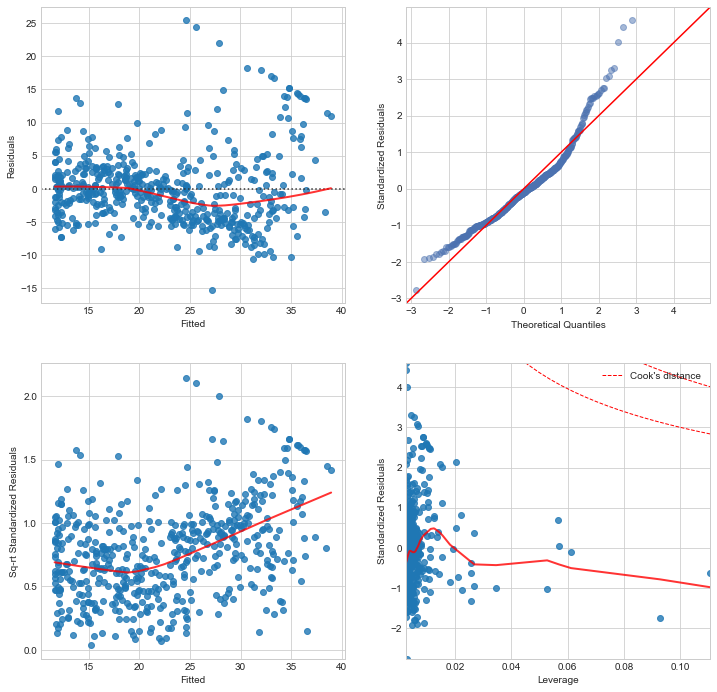

In [18]:
# Defining the variables:
fitted = lm2.fittedvalues
residuals = lm2.resid

# Standardization of the data
residuals_norm = lm2.get_influence().resid_studentized_internal

# Square root of absolute values of standardized residuals
residuals_abs_sqrt = np.sqrt(np.abs(residuals_norm))

# Leverage
lm_leverage = lm2.get_influence().hat_matrix_diag

fig = plt.figure(figsize=(12, 12))

res_vs_fit(fitted, residuals, fig.add_subplot(2, 2, 1))
qq_plot(residuals_norm, fig.add_subplot(2, 2, 2))
scale_location(fitted, residuals_abs_sqrt, fig.add_subplot(2, 2, 3))
leverage_vs_res_std(lm_leverage, residuals_norm, fig.add_subplot(2, 2, 4))

<br><br>
Log transformation:

In [19]:
lm5 = smf.ols('medv ~ np.log(rm)', data = data_boston).fit()
print(lm5.summary())

                            OLS Regression Results                            
Dep. Variable:                   medv   R-squared:                       0.436
Model:                            OLS   Adj. R-squared:                  0.435
Method:                 Least Squares   F-statistic:                     389.3
Date:                Tue, 05 Dec 2017   Prob (F-statistic):           1.22e-64
Time:                        11:19:27   Log-Likelihood:                -1695.4
No. Observations:                 506   AIC:                             3395.
Df Residuals:                     504   BIC:                             3403.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -76.4878      5.028    -15.213      0.0

<a id='qual_pred'></a>

#### 3.6.6 - Qualitative Predictors

In [20]:
# loading Carsets data set
carseats = pd.read_csv('Data/Carseats.csv', usecols=list(np.arange(1, 12)))
carseats.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No


In [21]:
lm_carseats = smf.ols('Sales ~ Income + Advertising + Price + Age + C(ShelveLoc)', data = carseats).fit()
print(lm_carseats.summary())

                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.707
Model:                            OLS   Adj. R-squared:                  0.703
Method:                 Least Squares   F-statistic:                     158.3
Date:                Tue, 05 Dec 2017   Prob (F-statistic):          1.33e-101
Time:                        11:19:27   Log-Likelihood:                -736.58
No. Observations:                 400   AIC:                             1487.
Df Residuals:                     393   BIC:                             1515.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept                 13

<a id='wri_fun'></a>

#### 3.6.7 - Writing Functions
We have already written some functions during this lab to help with plotting (Please see above)